# Foundations of Statistical analysis  Machine Leaning - Part 2
## Dr Christine Malot

# Day 1

## Example 1.1 - Importance of the number of observations

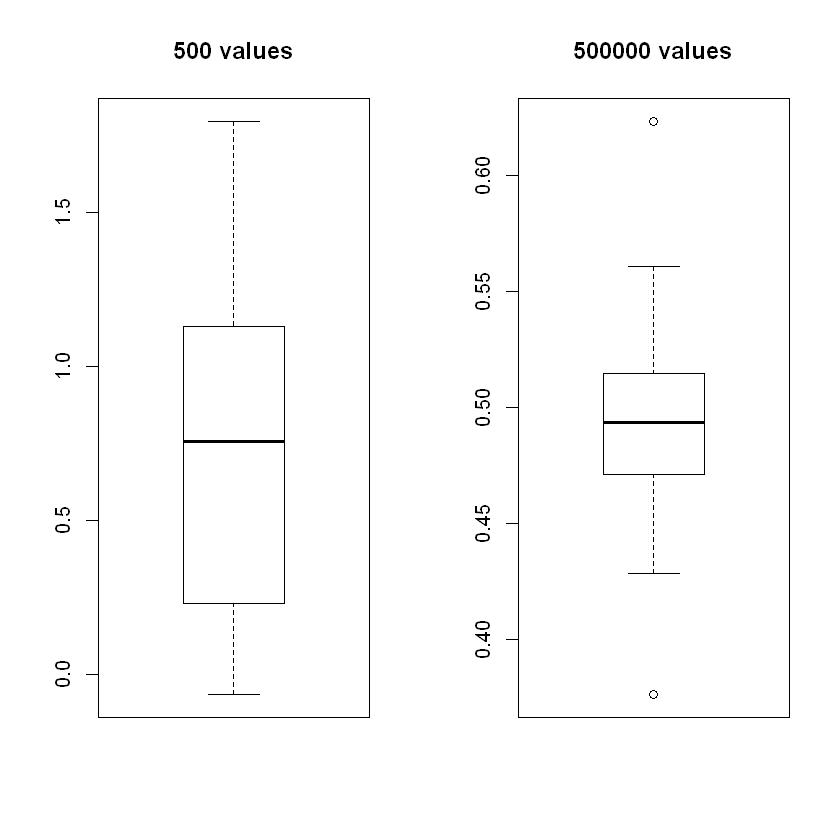

In [2]:
A <- rnorm(10,0.5,4)    #n too small to get a 0.5 as a good estimator
B <- rnorm(10000,0.5,4) #n is ok

Am<-matrix(rnorm(500,0.5,4),ncol=50)
Bm<-matrix(rnorm(500000,0.5,4),ncol=10000)

meanA<-apply(Am,1,mean)  #1 = for each row
meanB<-apply(Bm,1,mean)  #1 = for each row

# see the difference on the bar plot
par(mfrow = c(1,2))
boxplot(meanA,main = "500 values")
boxplot(meanB,main = "500000 values")


## Example 1.2 - Max(Xi) is a good estimator for uniform distribution
* simulation : A uniform distribution Unif(0,5) with 500000 observations

In [3]:
Am<-matrix(runif(500000,0,5),ncol=100)
maxA<-apply(Am,1,max)
sprintf("Estimator Max(Xi) of Theta in a Unif(0,Theta=5) distribution : %f" ,mean(maxA))
sprintf("The variance of the estimator is : %f", var(maxA))

[1] "Estimator Max(Xi) of Theta in a Unif(0,Theta=5) distribution : 4.949863"

[1] "The variance of the estimator is : 0.002424"

# Day 2

## Example 2.1 - Frequency vs density histogram

### The two histograms
* before the histogram the "summary" R function gives various information on the dataset
* for instance the fact that Mean >> Median reveal that it is not a symetric distribution
* after the graphes, the variable h$density, gives the values used in the density graph

[1] "Summary of the Dataset"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000761  0.668422  1.577319  2.312863  3.182293 14.822667 

[1] "Values of the density"

[1] 0.362 0.223 0.146 0.077 0.075 0.039 0.026 0.014 0.014 0.012 0.004 0.003
[13] 0.002 0.002 0.001

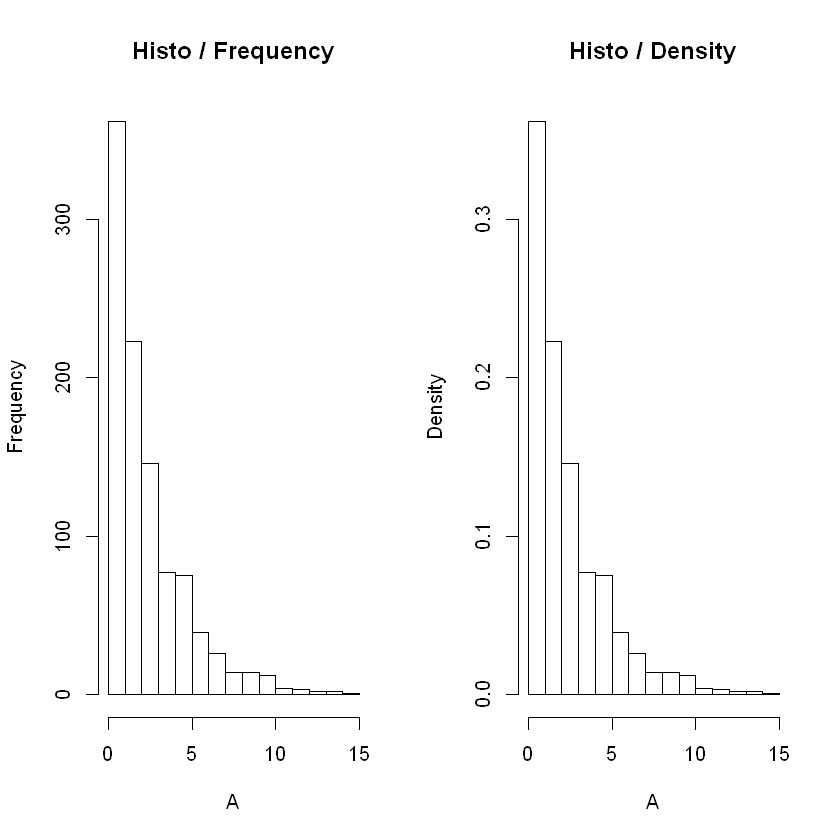

In [4]:
A=rexp(1000,0.4) # exponential distribution
sprintf("Summary of the Dataset")
summary(A) # various information on the sample
# differece between histogram frequancy / density
par(mfrow=c(1,2))
hist(A, main="Histo / Frequency") # frequency
h=hist(A,main="Histo / Density",freq=FALSE) # density
sprintf("Values of the density")
h$density # density distribution



### Case when frequency and density are not similar : non identical classes
* here the classes do not all have the same length : 1,2,1

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"


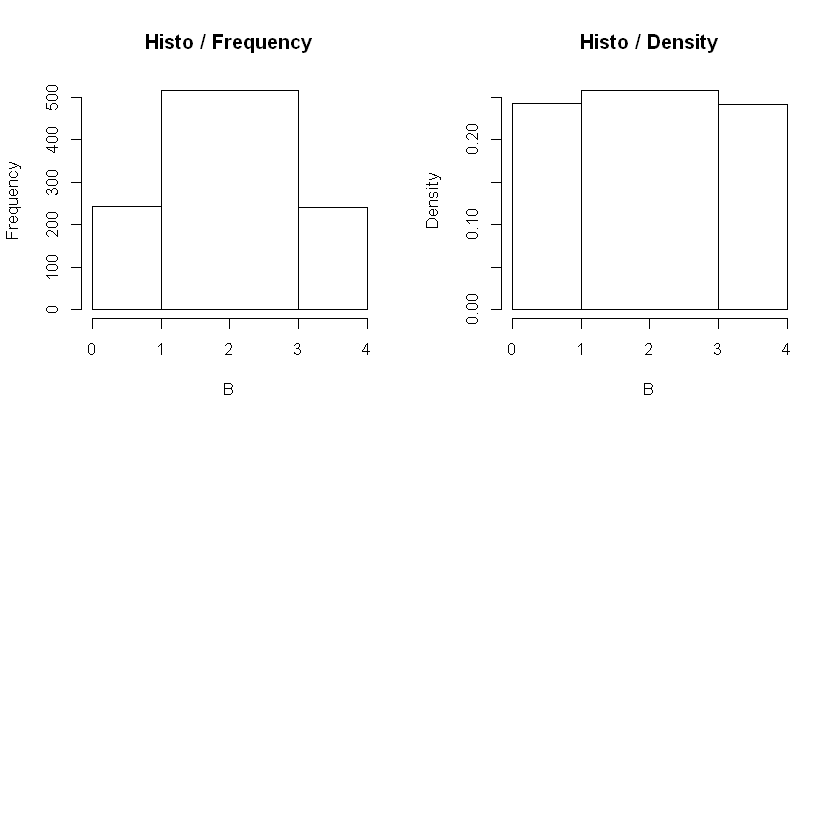

In [5]:
B=runif(1000,0,4)
par(mfrow=c(2,2))
hd=hist(B,breaks=c(0,1,3,4),freq = TRUE,main="Histo / Frequency")
hf=hist(B,breaks=c(0,1,3,4), freq = FALSE,main="Histo / Density")

## Example 2.2 - impact of size of classes on lambda calculation for exponential distribution
* Four graphes with increasing values of the size of the classes : 5, 20, 50, 100


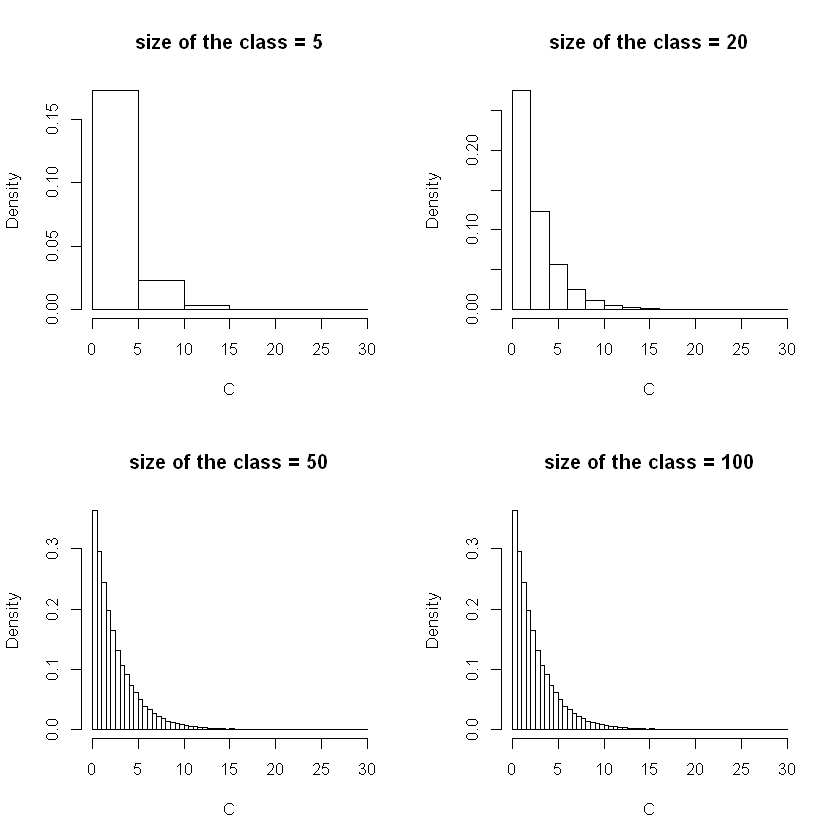

In [6]:
C=rexp(100000,0.4)
par(mfrow=c(2,2))
hist(C,breaks=5,freq=FALSE,main="size of the class = 5")
hist(C,breaks=20,freq=FALSE,main="size of the class = 20")
hist(C,breaks=50,freq=FALSE,main="size of the class = 50")
hist(C,breaks=100,freq=FALSE,main="size of the class = 100")

## Exemple 2.3 - find the lambda parameter of an exponential distribution

The simulation used is an exponential distribution with lambda = 4

### First solution : use the first value of the density vector : not a good approximation

In [7]:
A=rexp(1000,0.4)
hh=hist(A,breaks=100,plot=FALSE)
lambda_1 = hh$density[1] # density distribution - the first element of hh$density is an approximation of the estimator but ....
sprintf("First value of density vector : lambda = %f", lambda_1)


[1] "First value of density vector : lambda = 0.420000"

### Better solution : lambda_2 = 1 / mean(dataset) <- moment methods

In [8]:
A=rexp(1000,0.4)
lambda_2 = 1/mean(A)

sprintf("Moment methode : lambda_2 = %f", lambda_2)


[1] "Moment methode : lambda_2 = 0.398411"

### Impact of the number of observation on the calcul of 1/mean(A) with A an exponential distribution
* in red the approximation of lambda using 1/mean(A)
* in blue the real value of lambda = 0.4

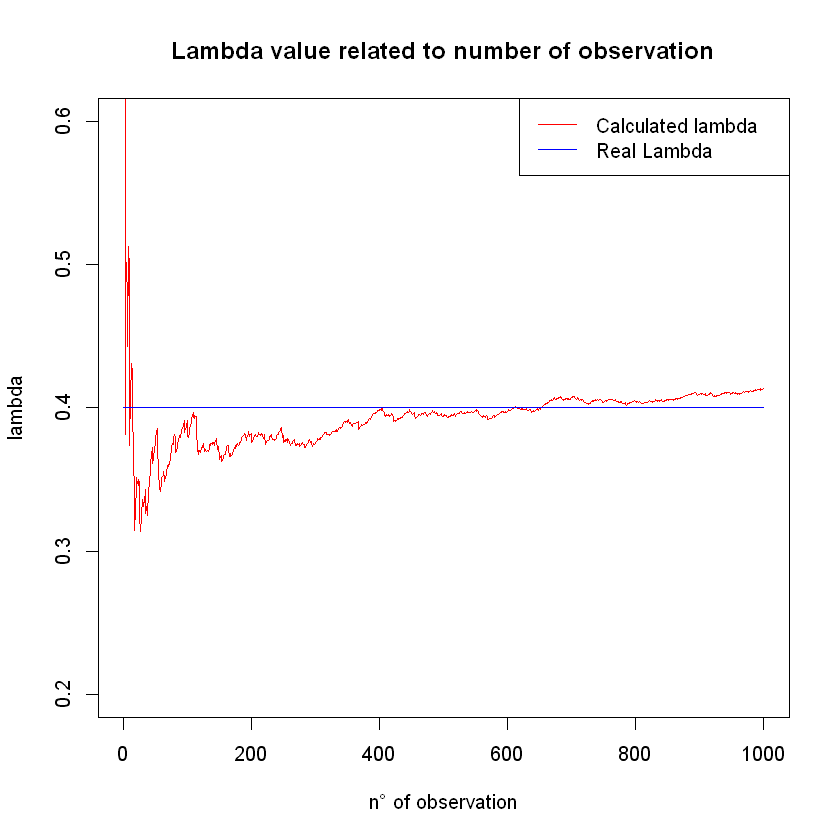

In [9]:
A=rexp(1000,0.4)
#length(A) # number of values in A
sumx=cumsum(A) # x1, x1+x2,x1+x2+x3 ...to calculate meanA for 1,2,3 ... element
barx=sumx/1:1000 # division a vector by a vector - division terme by term
esti_lambda = 1 / barx
par(mfrow=c(1,1))
plot(1:1000,esti_lambda,type='l',col='red',xlim=c(0,1001),ylim=c(0.2,0.6),main="Lambda value related to number of observation",xlab="n° of observation",ylab="lambda") # evolution of lambda estimation in fn of sample size
par(new=TRUE)
plot(c(0,1000),c(0.4,0.4),type='l',col='blue',xlim=c(0,1001),ylim=c(0.2,0.6),xlab="",ylab="") # in blue the "real" value
legend("topright" ,legend=c("Calculated lambda", "Real Lambda"), col=c("red", "blue","green"),lty = 1)



## Example 2.4 - 3 distribution graphes
* exponential distribution
* normal distribution
* uniforme distribution

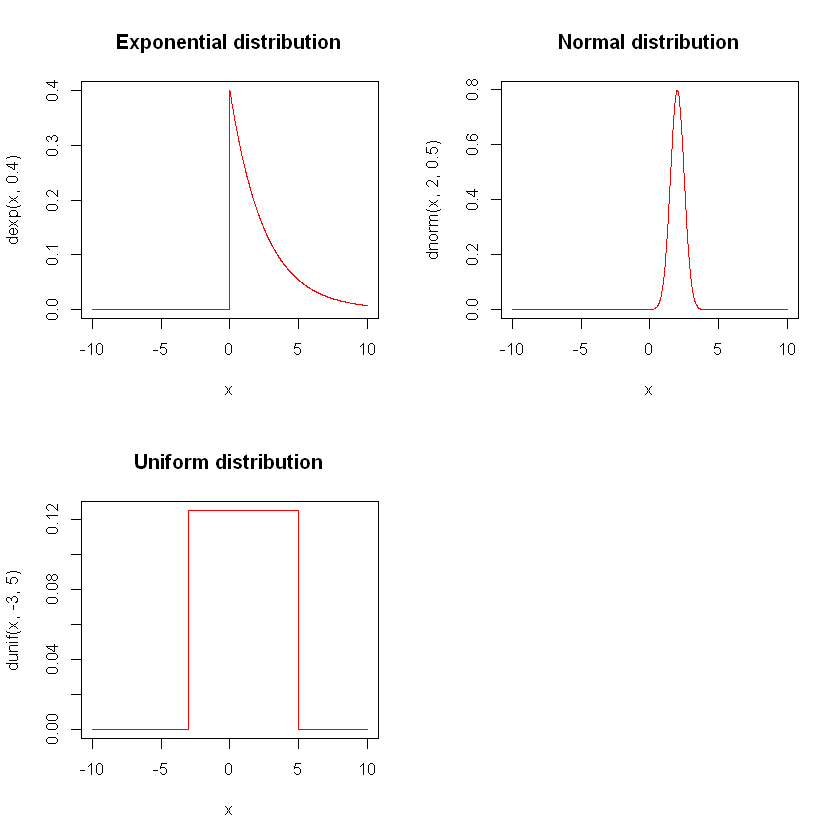

In [10]:
par(mfrow=c(2,2))
x=seq(-10,10,0.01)
plot(x,dexp(x,0.4),type='l',col='red',main="Exponential distribution") # exponential distribution
plot(x,dnorm(x,2,0.5),type='l',col='red',main="Normal distribution") # normal distribution
plot(x,dunif(x,-3,5),type='l',col='red',main="Uniform distribution") # uniform distribution

# Day 3
## Exemple 3.1 - Difference of distribution between Gaussian and Student
* Gaussian (normal distibution) in red
* Student (number of degree of liberty 2) in blue

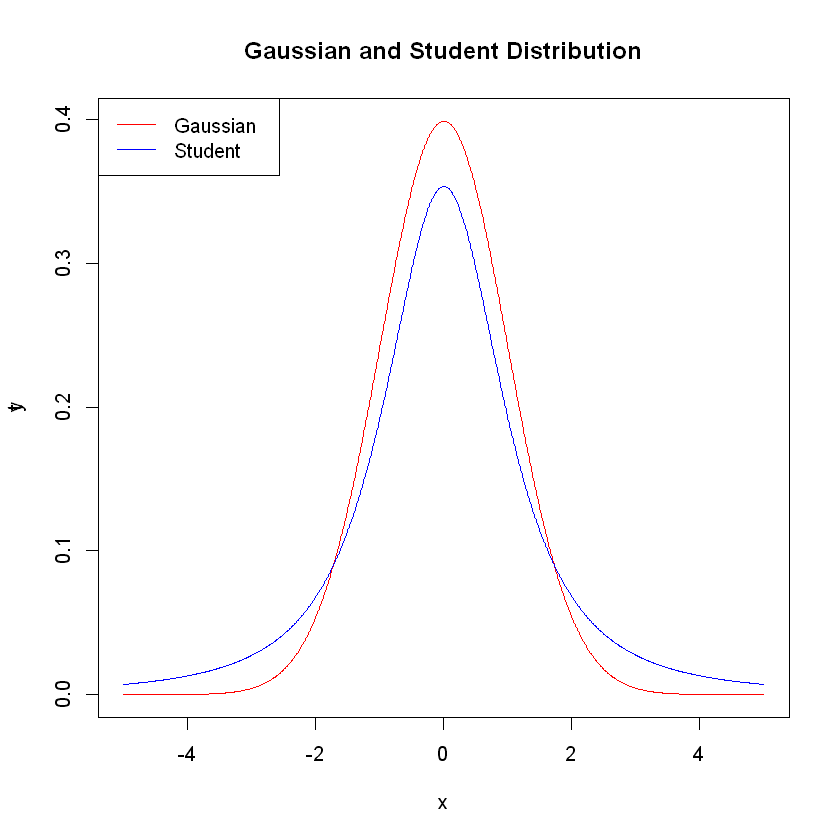

In [11]:

x=seq(-5,5,0.01)
y=dnorm(x)
t=dt(x,2)
maxy=max(y,t)
plot(x,y,type='l',col='red',xlim=c(-5,5),ylim=c(0,maxy),main="Gaussian and Student Distribution")
par(new=TRUE)
plot(x,t,type='l',col='blue',xlim=c(-5,5),ylim=c(0,maxy))
legend("topleft" ,legend=c("Gaussian", "Student"), col=c("red", "blue"),lty = 1)


## Example 3.2 - using R to compute Gaussian and Student Probabilies
    * pnorm (Gaussian), pt (Student) to get a probability knowing a value for the R.V
    * qnorm (Gaussian), qt (Student) to get a R.V value knowing the probability
    * take care, pnorm/qnorm use standard deviation and not variance as third parameter

In [12]:
# P(-0.28 <= Z <= 0.57)
sprintf ("P(-0.28 <= Z <= 0.57) for N(0,1) = %f" , pnorm(0.57)-pnorm(-0.28))
sprintf ("P(-0.2 <= Z <= 1.2) for N(1,4) = %f" , pnorm(1.2,1,2)-pnorm(-0.2,1,2))

sprintf ("P(-0.271 <= Z <= 0.271) for T(4) = %f" , pt(0.271,4)-pt(-0.271,4))
sprintf ("P(0,414 <= Z <= 1.19) for T(4) = %f" , pt(1.19,4)-pt(0.414,4))

sprintf ("t so that P( Z <= t) = 0,95 for N(0,1), t = %f" , qnorm(0.95))
sprintf ("t so that P( Z <= t) = 0,95 for N(1,4), t = %f" , qnorm(0.95,1,2))


[1] "P(-0.28 <= Z <= 0.57) for N(0,1) = 0.325922"

[1] "P(-0.2 <= Z <= 1.2) for N(1,4) = 0.265575"

[1] "P(-0.271 <= Z <= 0.271) for T(4) = 0.200199"

[1] "P(0,414 <= Z <= 1.19) for T(4) = 0.200131"

[1] "t so that P( Z <= t) = 0,95 for N(0,1), t = 1.644854"

[1] "t so that P( Z <= t) = 0,95 for N(1,4), t = 4.289707"

## Example 3.3 - Compare Student distribution when the degree of freedom is changing
* comparaison with 2,4 and 10 degree of freedom

[1] "value for which Probability for Student T(2) = 0.95 :  t= 1.885618"

[1] "value for which Probability for Student T(2) = 0.95 :  t= 1.533206"

[1] "value for which Probability for Student T(2) = 0.95 :  t= 1.372184"

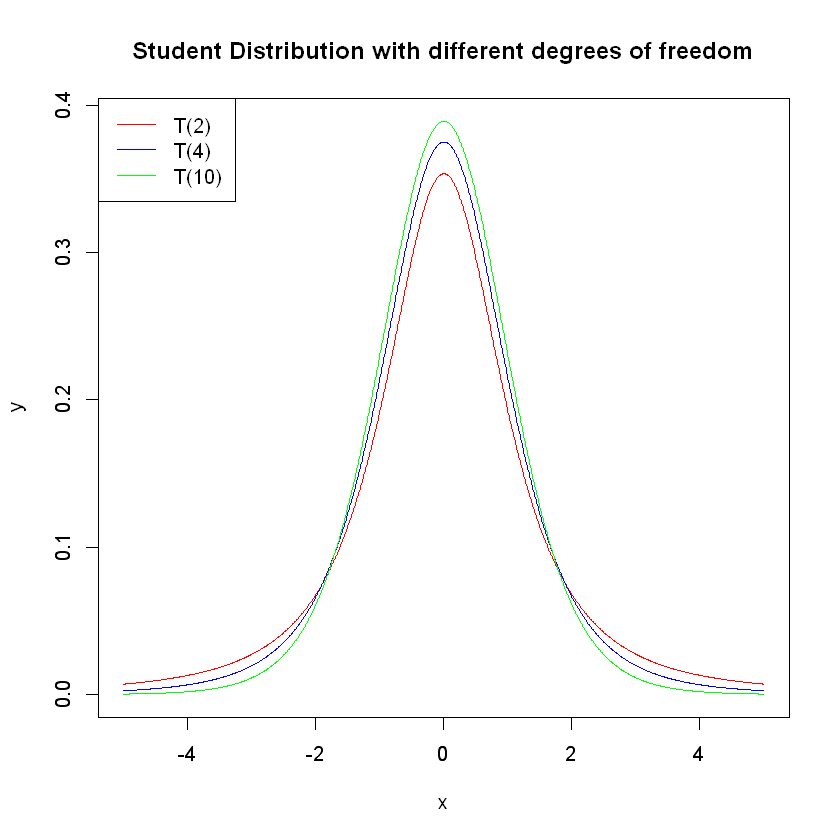

In [13]:
x=seq(-5,5,0.01)
y2=dt(x,2)
y4=dt(x,4)
y10=dt(x,10)
maxy=max(y2,y4,y10)
plot(x,y2,type='l',col='red',xlim=c(-5,5),ylim=c(0,maxy),ylab="y",main="Student Distribution with different degrees of freedom")
par(new=TRUE)
plot(x,y4,type='l',col='blue',xlim=c(-5,5),ylim=c(0,maxy),xlab="",ylab="")
par(new=TRUE)
plot(x,y10,type='l',col='green',xlim=c(-5,5),ylim=c(0,maxy),xlab="",ylab="")
legend("topleft" ,legend=c("T(2)", "T(4)","T(10)"), col=c("red", "blue","green"),lty = 1)
sprintf("value for which Probability for Student T(2) = 0.95 :  t= %f",qt(0.9,2))
sprintf("value for which Probability for Student T(2) = 0.95 :  t= %f",qt(0.9,4))
sprintf("value for which Probability for Student T(2) = 0.95 :  t= %f",qt(0.9,10))


## Exemple 3.4 - Showing that the Mean of a dataset can be outside of the calculated Confidence Interval
* but with a probability linked to the choice of alpha
* in the example, the simulation is a Normal distribution (mu=1,sd=2) and alpha = 0.05
* we suppose that the variance = 4 is known
* we run the simulation 100 times and check the number of times that mu is out of the calculated CI

In [14]:
#if you run it several times, you can have mu out of CI 
K=100
M=matrix(data=0,ncol=2,nrow=K) # one CI by row
for (i in 1:K)
{
  data=rnorm(1000,2,1) # normal mu=2 sd= 1
  # alpha = 5%, sd is known
  lowerbound = mean(data)-1/sqrt(1000)*qnorm(0.975)
  upperbound = mean(data)+1/sqrt(1000)*qnorm(0.975)
  CI =c(lowerbound,upperbound)
  M[i,]=CI
}
#M # we should have at most 5% of cases where mu outside of CI# counting when we are outside
B=(M[,1]>2)+(M[,2]<2)
sprintf("mu is out of CI %i times over %i. The maximum should be : %i times",sum(B),K,5) #number of sample where mu out of CI




[1] "mu is out of CI 4 times over 100. The maximum should be : 5 times"

## Example 3.5 - Is Max(Xi) a good approximation for N in a Binomail distribution(N,p) (as it is for Uniform Distribution)
* we simulate 10000 Binomial distribution sample (10,p) for p=0.8 and p=0.2
* for p=0.8, the Max(Xi) estimator is good (very close to 10)
* for p=0.2, the Max(Xi) estimator is not good
* the estimator is not good for p=0.2 because the probability to have a 10 value among the 10000 observations is very low

In [15]:
#binomial
D1=rbinom(10000,10,0.8) # N=10
sprintf("estimator of N (=10) for Binomial(10,0.8) : %f - very good",max(D1)) # ok
D2=rbinom(10000,10,0.2)
sprintf("estimator of N (=10) for Binomial(10,0.2) : %f - not good",max(D2)) # ok
sprintf("Probability to reach to have a sample = 10 with p=0.2 is very low : %f",0.2^10*10000) # ok


[1] "estimator of N (=10) for Binomial(10,0.8) : 10.000000 - very good"

[1] "estimator of N (=10) for Binomial(10,0.2) : 7.000000 - not good"

[1] "Probability to reach to have a sample = 10 with p=0.2 is very low : 0.001024"

# Day 4
## Example 4.1 Modelisation of dataset data1.txt

### Access to the file

In [16]:
getwd() # folder used at the moment
# to modify the default header : setwd(filename)
# dir() # to see the content of the current directory

[1] "C:/Users/erick/OneDrive - Data ScienceTech Institute/course/FSML2/R samples"

### use of read.table to read a file
* data1 is a data.frame (works as a list)
* use "header=TRUE or header = FALSE" depending if you have header in the file
* in our case there is no header => header = FALSE
* argument "set=" to fixe separator. For instance set=";" for a ";" separator
* in R by default the "." is used as a decimal separator. To change it dec = ','

In [17]:
data1 <- read.table("data1.txt", header = FALSE, sep = ",")
head(data1) # check that data's are ok

,V1
,<dbl>
1,0.5792213
2,1.7901780
3,0.3182912
4,1.5247270
5,2.2034720
6,0.5783241


* To access to the first observation within the data1 data.frame

In [18]:
sprintf("First row of dataset : %f",data1[1,])

[1] "First row of dataset : 0.579221"

* To Get the size of the dataset

In [19]:
sprintf("dimension of the dataset data1.txt : %i observations", dim(data1)[1])


[1] "dimension of the dataset data1.txt : 5000 observations"

### Looking at the datas we found that we have a quantitative and continuous variable

* the histogramme will be the correct representation
* as.matrix() transform the object into a matrix

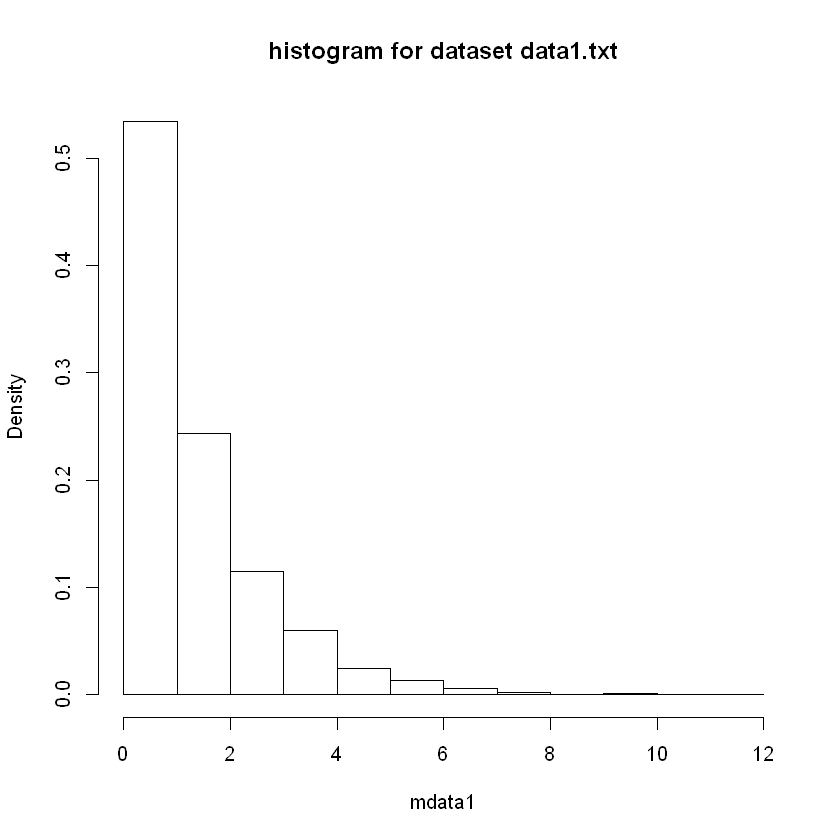

In [20]:
mdata1 = as.matrix(data1)
hist(mdata1,freq = FALSE,main="histogram for dataset data1.txt")




### We guess that it can be an exponential distribution
* we need to estimate the parameter lambda
* by method of moments an estimator lambda_1 = 1/mean(Xi)

In [21]:
lambda_1 = 1/mean(mdata1)
sprintf("An estimator lambda = %f",lambda_1)


[1] "An estimator lambda = 0.757914"

### Compare Theory and Practice

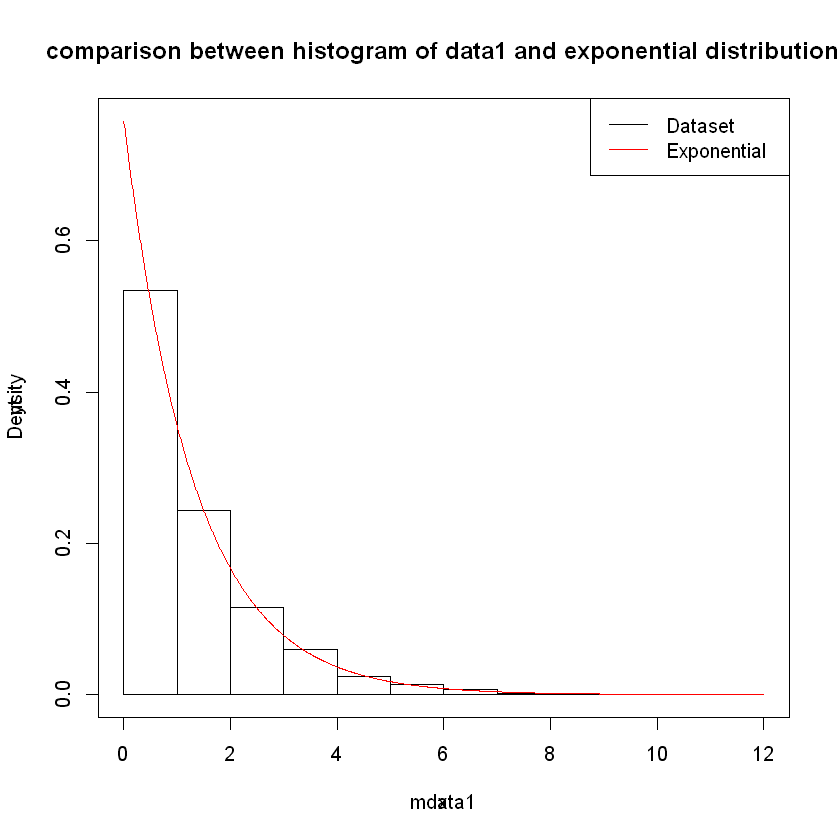

In [22]:
H=hist(mdata1,plot=FALSE)
limits = H$breaks
infl=min(limits) # minimum value of the dataset
subl=max(limits) # maximum value of the dataset
x=seq(infl,subl,0.01) #step small enough to have something smooth
yt=dexp(x,lambda_1) # theorical exponential distribution
yh=h$density
ymax=max(yt,yh)
hist(mdata1,freq=FALSE,xlim=c(infl,subl),ylim=c(0,ymax),main="comparison between histogram of data1 and exponential distribution")
par(new=TRUE)
plot(x,yt,type='l',col='red',xlim=c(infl,subl),ylim=c(0,ymax)) # exponential distribution
legend("topright" ,legend=c("Dataset", "Exponential"), col=c("black", "red"),lty = 1)



### The fit is good unless close to 0
* so we split the first classes and group the last ones to have a better graph

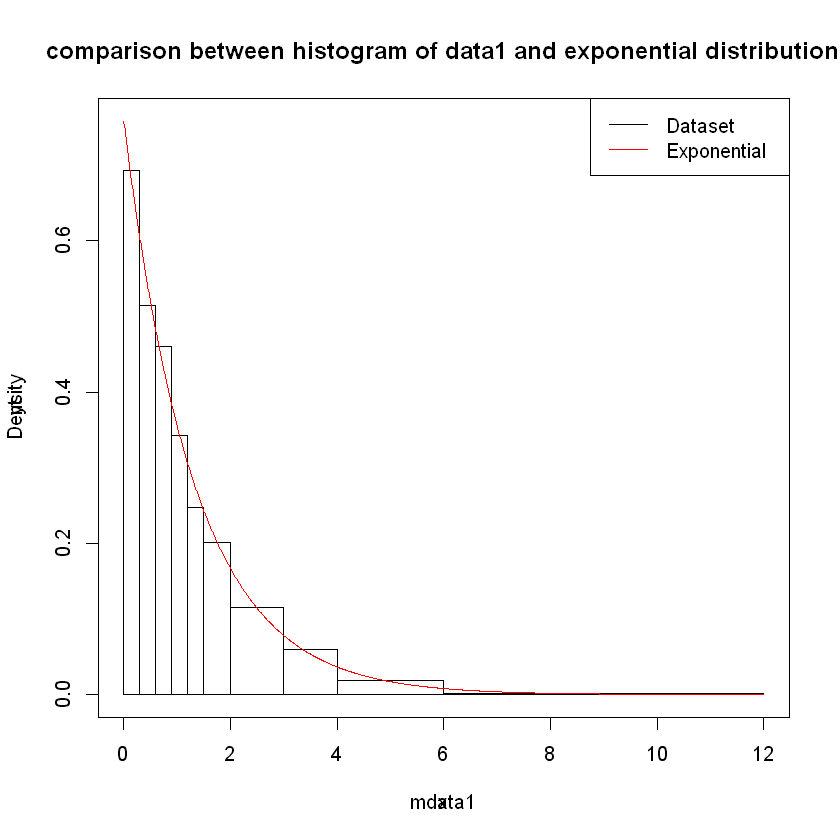

In [23]:
H=hist(mdata1,plot=FALSE)
limits = H$breaks
infl=min(limits)
subl=max(limits)
x=seq(infl,subl,0.01) #step small enough to have something smooth
yt=dexp(x,lambda_1)
yh=h$density
ymax=max(yt,yh)
hist(mdata1,breaks=c(0,0.3,0.6,0.9,1.2,1.5,2,3,4,6,12),freq=FALSE,xlim=c(infl,subl),ylim=c(0,ymax),main="comparison between histogram of data1 and exponential distribution")
par(new=TRUE)
plot(x,yt,type='l',col='red',xlim=c(infl,subl),ylim=c(0,ymax)) # exponential distribution
legend("topright" ,legend=c("Dataset", "Exponential"), col=c("black", "red"),lty = 1)


### Conclusion : our chose of an exponential distribution as a model seems to be ok

## Example 4.2 Modelisation of dataset data2.txt

### Looking at the datas we found that we have a quantitative and discrete variable


* discrete values => barplot
* the table function : count the occurences of each value / number of observation


[1] "dimension of the dataset data2.txt : 500 observations"

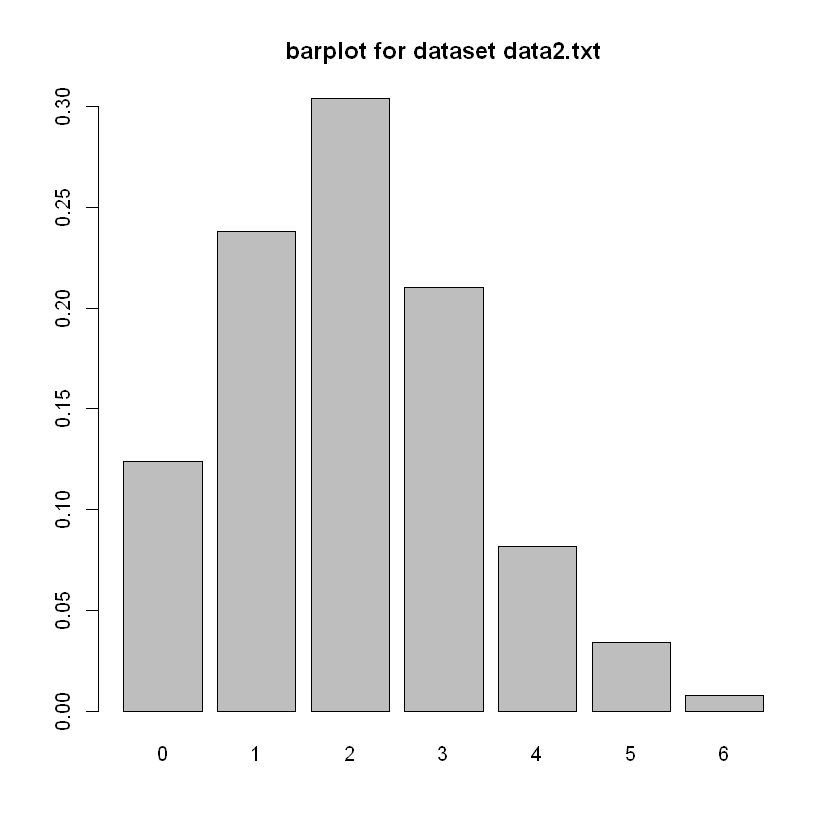

In [24]:
# dataset 2
data2 <- read.table("data2.txt", header = FALSE, sep = ",")
count=table(data2)
sprintf("dimension of the dataset data2.txt : %i observations", dim(data2)[1])
mdata2 = as.matrix(data2)
barplot(count / 500, main="barplot for dataset data2.txt")


### We guess that it can be either a binomial or a poisson distribution

* For Poisson, by method of moments, an estimator lambda_p is empirical mean
* For Binomial, by method of moment :
    1. p_b = (mu-var)/mu, 
    2. N_b =mu^2/(mu-var) - take care, N must be an insteger


In [25]:
lambda_p = mean(as.matrix(data2)) # an estimation - associated value to an estimator
sprintf("The lambda_p estimator for Poisson distribution = %f",lambda_p)

p_b = (mean(mdata2)-var(mdata2))/mean(mdata2)
N_b = mean(mdata2)/p_b # must be an integer
sprintf("The p_b and N_b estimators for binomial distribution are : p_b = %f and N_b = %f",p_b,N_b)
sprintf("Since N_b must be an integer, the new value will be N_b = 13 and p_b must be recalculated with this value")
N_b = 13
p_b = mean(mdata2)/N_b
sprintf("The new value of p_b is %f",p_b)


[1] "The lambda_p estimator for Poisson distribution = 2.022000"

[1] "The p_b and N_b estimators for binomial distribution are : p_b = 0.154830 and N_b = 13.059490"

[1] "Since N_b must be an integer, the new value will be N_b = 13 and p_b must be recalculated with this value"

[1] "The new value of p_b is 0.155538"

### We do graphical superposition to choose between Poisson and Binomial and compare the theory with the given dataset data2

data2
  0   1   2   3   4   5   6 
 62 119 152 105  41  17   4 

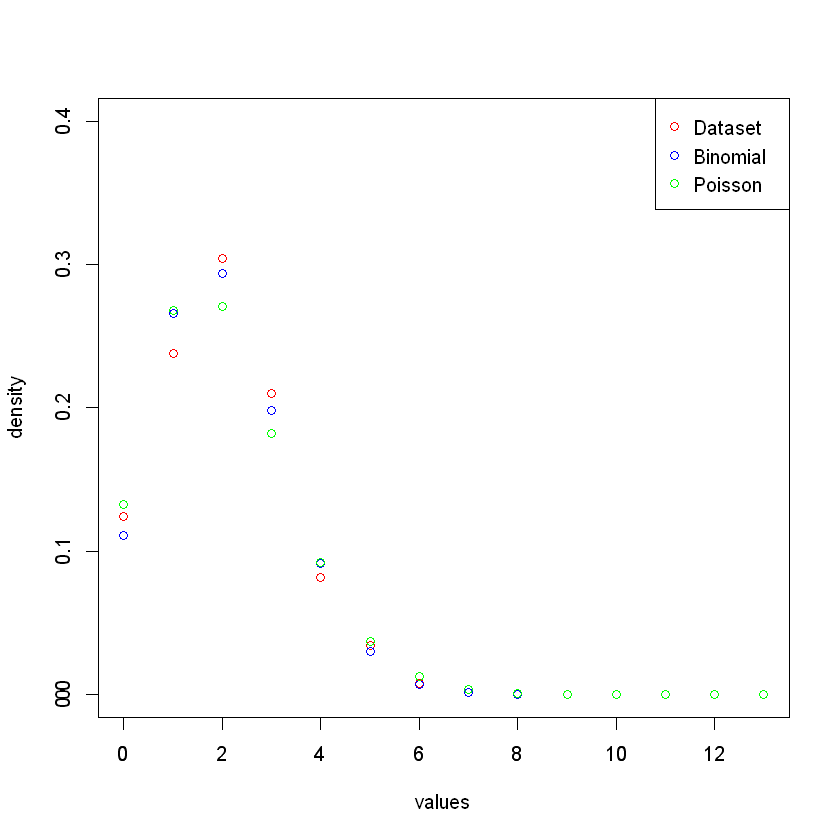

In [26]:
reality = count/500
plot(0:6,reality,col='red',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="values",ylab="density")

xx=0:N_b
par(new=TRUE)
Bin = dbinom(xx,N_b,p_b)
count_bin = table(Bin)
plot(xx,Bin,col='blue',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="",ylab="")

par(new=TRUE)
x=0:N_b
Pois = dpois(x,lambda_p)
count_pois = table(Pois)
#barplot(count_pois / 5000, col = 'blue')
plot(x,Pois,col='green',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="",ylab="")
legend("toprigh" ,legend=c("Dataset", "Binomial","Poisson"), col=c("red", "blue","green"),pch = c(1,1,1))




### Binomial is closer to the dataset so we choose the Binomial Distribution with p = 0.1555 and N = 13

* Difficult to choose between Poison and Binomial because Poison can be an approximation of Binomial

* Practicaly, it is easely to use Poisson (one parameter) than Binomial (two parameters)

## Tips to be sure that we have numerical values => try to add two values

In [27]:
x<-sample(1:10,50,replace=TRUE) # 
sprintf("addition of two values works x[1]+x[4] = %i",x[1]+x[4])
xf=as.factor(x)
sprintf("Here we have categorical values looking like numerical values - see Levels information between the table")
head(xf) # here level = categorical
sprintf("If we try to add two values we get an error")
xf[4]+xf[1]

[1] "addition of two values works x[1]+x[4] = 15"

[1] "Here we have categorical values looking like numerical values - see Levels information between the table"

[1] 6 1 1 9 4 5
Levels: 1 2 3 4 5 6 7 8 9 10

[1] "If we try to add two values we get an error"

Warning message in Ops.factor(xf[4], xf[1]):
"'+' not meaningful for factors"


[1] NA

### Available dataset in R : iris database
* help("iris") : gives detailled information on the dataset

In [28]:
head(iris)
#help("iris")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Example 4.3 Calculation of Khi square with R


In [29]:
sprintf(" Calculation of a Khi square probability using pchisq : %f",pchisq(1.21,7)) # t=1.21, 7 degree liberty
sprintf(" Calculation of a t value, the probabily being given : %f",qchisq(0.9,7))

[1] " Calculation of a Khi square probability using pchisq : 0.009305"

[1] " Calculation of a t value, the probabily being given : 12.017037"

### how to get information on statistical function in R
* start the general help : help.Start()
* browse into the packages
* open the "stats"package

# Day 5

## Example 5.1 dataset 3

       V1       
 Min.   : 6.00  
 1st Qu.:10.00  
 Median :11.00  
 Mean   :10.58  
 3rd Qu.:11.00  
 Max.   :12.00  

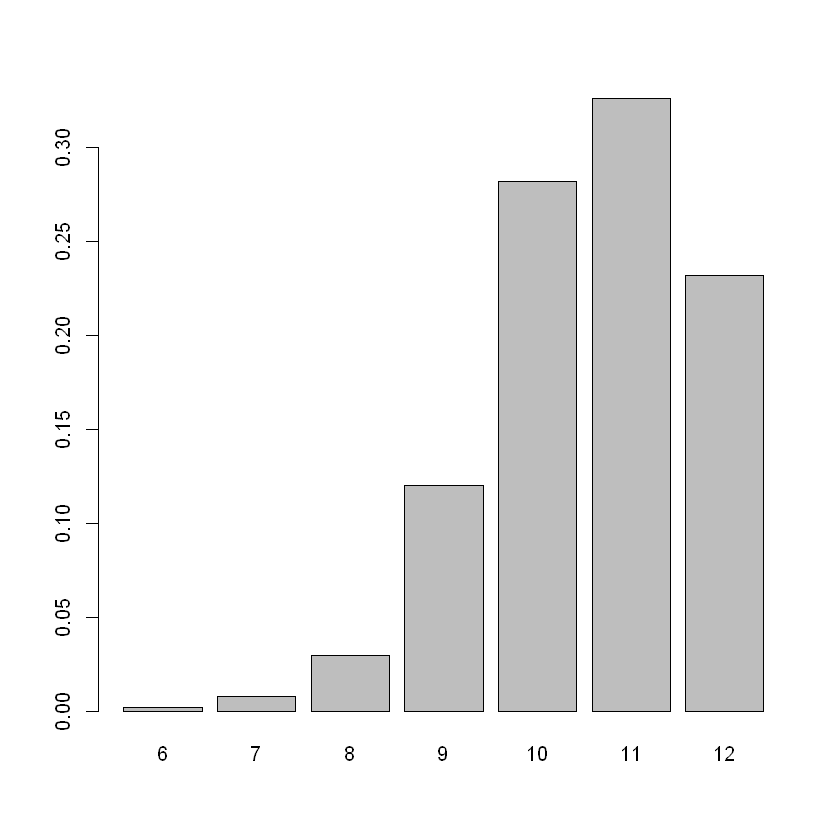

[1] "The p_b and N_b estimators for binomial distribution are : p_b = 0.880275 and N_b = 12.016697"

[1] "Since N_b must be an integer, the new value will be N_b = 12 and p_b must be recalculated with this value"

[1] "Red curve better fit the real curve (blue) => we can estimate that it is a binomial distribution with p = 0.881500 and N = 12.000000"

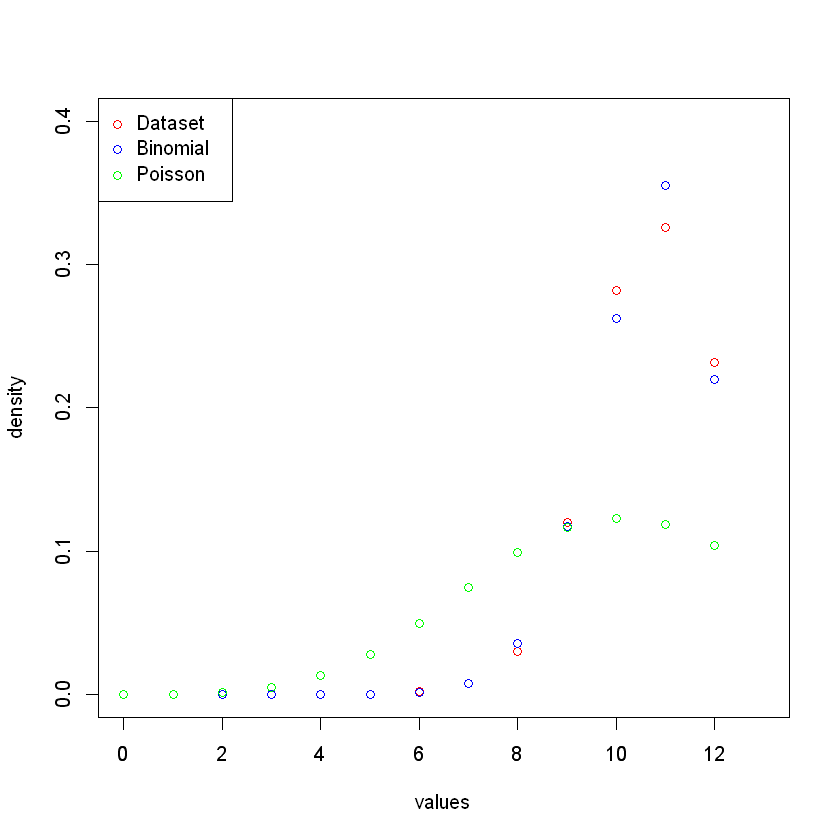

In [11]:
df3 <- read.table("C:\\Users\\erick\\OneDrive - Data ScienceTech Institute\\course\\FSML2\\R samples\\data3.txt", header = FALSE, sep = ",")
A3 = as.matrix(df3)
summary(A3) 
reality = table(A3)/500
barplot(reality)
x=6:12

plot(x,reality,col='red',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="values",ylab="density")


p_b = (mean(A3)-var(A3))/mean(A3)
N_b = mean(A3)/p_b # must be an integer
sprintf("The p_b and N_b estimators for binomial distribution are : p_b = %f and N_b = %f",p_b,N_b)
sprintf("Since N_b must be an integer, the new value will be N_b = 12 and p_b must be recalculated with this value")
N_b = 12
p_b = mean(A3)/N_b

xx=0:N_b
par(new=TRUE)
Bin = dbinom(xx,N_b,p_b)
count_bin = table(Bin)
plot(xx,Bin,col='blue',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="",ylab="")

par(new=TRUE)
x=0:12
Pois = dpois(x,lambda)
count_pois = table(Pois)
#barplot(count_pois / 5000, col = 'blue')
plot(x,Pois,col='green',type='p',xlim=c(0,13),ylim=c(0,0.4),xlab="",ylab="")
legend("topleft" ,legend=c("Dataset", "Binomial","Poisson"), col=c("red", "blue","green"),pch = c(1,1,1))
sprintf("Red curve better fit the real curve (blue) => we can estimate that it is a binomial distribution with p = %f and N = %f",p_b,N_b)


## Exemple 5.2 Dataset 4

       V1         
 Min.   :-6.1644  
 1st Qu.:-0.4391  
 Median : 0.5817  
 Mean   : 0.5783  
 3rd Qu.: 1.5857  
 Max.   : 7.3608  

[1] "we can estimate that it is a normal distribution with mu = 0.578265 and sigma = 1.504153"

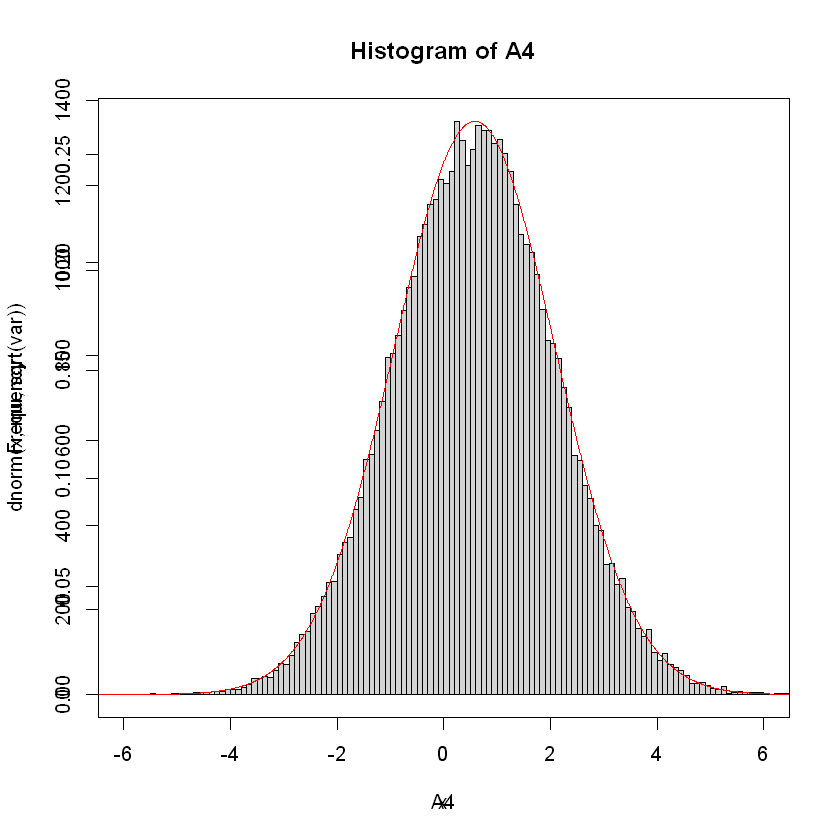

In [12]:
# dataset 4
df4 <- read.table("C:\\Users\\erick\\OneDrive - Data ScienceTech Institute\\course\\FSML2\\R samples\\data4.txt", header = FALSE, sep = ",")
A4 = as.matrix(df4)
summary(A4) 
hist(A4,breaks=100,xlim=c(-6,6)) 
mu = mean(A4) 
var = var(A4)
x=seq(-10,10,0.01)
par(new=TRUE)
plot(x,dnorm(x,mu,sqrt(var)),type='l',col='red',xlim=c(-6,6)) # exponential distribution
sprintf("we can estimate that it is a normal distribution with mu = %f and sigma = %f",mu,sqrt(var))



## Exemple 5.3 - reading normal values on the Normal Table
* X ~ N(-1,4)
* calculate P(X<= 0), P(X>= -1.5), P(-1.2<=X<=0.8)
* found t so that P(X<=t) = 0.9, P(X>=t)=0.95, P(-1-t<=X<=-1+t)=0.95

Using the table of N(0,1),  Y = (X-1)/2
* P(X<= 0) <=> P(Y<=0.5) = 0,6915
* P(X>= -1.5) <=> P(Y>= -0.25) = P(Y<= 0.25) = 0.5987
* P(-1.2<=X<=0.8) <=> P(-0.1<=Y<=0.9) = P(Y<=0.9)-P(Y<=-0.1) = P(Y<=0.9)-(1 - P(Y<=0.1)) = 0,3557
* P(X<=t) = 0.9 <=> P(Y<=(t+1)/2)=0.9 => (t+1)/2 = 1.2816, t =1.562
* P(X>=t)=0.95 => P(X<=t)=0.05 => P(Y<=(t+1)/2)=0.05 P(-Y<=(t+1)/2)=0.95 (t+1)/2=-1,645 => t=-4,29
* P(-1-t<=X<=-1+t)=0.95 => P(X<=-1+t)-P(X<=-1-t)=0.95=>P(Y<=t/2)-P(Y<=-t/2)=0.95=> 2*P(Y<=t/2)-1=0.95=>P(Y<=t/2)<=0.975,t=3.92

In [46]:
sprintf("X ~ N(-1,4), P(X<=0) = %f",pnorm(0,-1,2))
sprintf("X ~ N(-1,4), P(X>=-1.5) = %f",1-pnorm(-1.5,-1,2))
sprintf("X ~ N(-1,4), P(-1.2<=X<=0.8) = %f",pnorm(0.8,-1,2)-pnorm(-1.2,-1,2))
sprintf("X ~ N(-1,4), t s.t P(X<=t) = 0.9, t = %f",qnorm(0.9,-1,2))
sprintf("X ~ N(-1,4), t s.t P(X>=t) = 0.95, t = %f",-qnorm(0.95,-1,2)-2)
sprintf("X ~ N(-1,4), t s.t P(-1-t<=X<=-1+t) = 0.95, t = %f",qnorm(0.975,-1,2)+1)

[1] "X ~ N(-1,4), P(X<=0) = 0.691462"

[1] "X ~ N(-1,4), P(X>=-1.5) = 0.598706"

[1] "X ~ N(-1,4), P(-1.2<=X<=0.8) = 0.355768"

[1] "X ~ N(-1,4), t s.t P(X<=t) = 0.9, t = 1.563103"

[1] "X ~ N(-1,4), t s.t P(X>=t) = 0.95, t = -4.289707"

[1] "X ~ N(-1,4), t s.t P(-1-t<=X<=-1+t) = 0.95, t = 3.919928"

### Exemple 5.4 - reading normal values on the Khi two table
* C ~ X2(11)
* calculate P(C<= 17.275), P(C>= 4.575), P(3.053<=C<=21.92)
* found f so that P(C<=f) = 0.9, P(C>=f)=0.9
### Using the table of X2(11)
* P(C <= 17.125) = 0.9
* P(C >= 4.575 ) = 0.95
* P(3.053 <= C <= 21.92) = P(C <= 21.92)-P(C <= 3.053 ) = 0.965
* P(C <= f) = 0.9 <=> f = 17.275
* P(C >= f) = 0.9 <=> f = 5.578


In [57]:
sprintf("X ~ X2(11), P(C <= 17.125) = %f",pchisq(17.125,11))
sprintf("X ~ X2(11), P(C >= 4.575) = %f",1-pchisq(4.575,11))
sprintf("X ~ X2(11), P(3.053 <= C <= 21.92) = %f",pchisq(21.92,11)-pchisq(3.053,11))
sprintf("X ~ X2(11), t s.t P(C<=f) = 0.9, t = %f",qchisq(0.9,11))
sprintf("X ~ X2(11), t s.t P(C>=f) = 0.9, t = %f",qchisq(0.1,11))

[1] "X ~ X2(11), P(C <= 17.125) = 0.895768"

[1] "X ~ X2(11), P(C >= 4.575) = 0.949992"

[1] "X ~ X2(11), P(3.053 <= C <= 21.92) = 0.965006"

[1] "X ~ X2(11), t s.t P(C<=f) = 0.9, t = 17.275009"

[1] "X ~ X2(11), t s.t P(C>=f) = 0.9, t = 5.577785"

### Exemple 5.5 - reading normal values on the Student table
* C ~ T(5)
* calculate P(abs(T)<= 0.92), P(T<= 2.015), P(T>=3.365)
* found z so that P(T>=z) = 0.4, P(T<=z)=0.05, P(-z <= T <= z) = 0.3
### Using the table of T(5)
* P(abs(T)<= 0.92) = 1-0.4 = 0.6
* P(T<= 2.015) = 1- 0.10/2 = 0.95
* P(T>=3.365) = 0.02/2=0.01
* P(T>=z) = 0.4, z = 0.267
* P(T<=z)=0.05, z = - 2.015 (value for 0.10)
* P(-z <= T <= z) = 0.3, z = 0.408


In [66]:
sprintf("X ~ T(5), P(abs(T) <= 0.92) = %f",2*pt(0.92,5)-1)
sprintf("X ~ T(5), P(T <= 2.015) = %f",pt(2.015,5))
sprintf("X ~ T(5), P(T >= 3.365) = %f",1-pt(3.365,5))
sprintf("X ~ T(5), t s.t P(T>=z) = 0.4, t = %f",qt(1-0.4,5))
sprintf("X ~ T(5), t s.t P(T<=z) = 0.05, t = %f",qt(0.05,5))
sprintf("X ~ T(5), t s.t P(-z <= T <= z) = 0.3, t = %f",qt((1+0.3)/2,5))


[1] "X ~ T(5), P(abs(T) <= 0.92) = 0.600217"

[1] "X ~ T(5), P(T <= 2.015) = 0.949997"

[1] "X ~ T(5), P(T >= 3.365) = 0.009999"

[1] "X ~ T(5), t s.t P(T>=z) = 0.4, t = 0.267181"

[1] "X ~ T(5), t s.t P(T<=z) = 0.05, t = -2.015048"

[1] "X ~ T(5), t s.t P(-z <= T <= z) = 0.3, t = 0.408229"